In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [4]:
data = pd.read_csv('../input/mushroom-classification/mushrooms.csv')

In [5]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Preprocessing

In [6]:
mappings = list()

encoder = LabelEncoder()
for column in range(len(data.columns)):
    data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [7]:
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

In [44]:
scaler = StandardScaler()
new_data = pd.DataFrame(scaler.fit_transform(data[['class', 'cap-shape', 'cap-surface', 'cap-color']]), columns=['class', 'cap-shape', 'cap-surface', 'cap-color']) #making new smaller dataset
new_data

,class,cap-shape,cap-surface,cap-color
0,1.036613,1.029712,0.140128,-0.198250
1,-0.964680,1.029712,0.140128,1.765874
2,-0.964680,-2.087047,0.140128,1.373049
3,1.036613,1.029712,0.953270,1.373049
4,-0.964680,1.029712,0.140128,-0.591075
...,...,...,...,...
8119,-0.964680,-0.216992,0.140128,-0.198250
8120,-0.964680,1.029712,0.140128,-0.198250
8121,-0.964680,-0.840343,0.140128,-0.198250
8122,1.036613,-0.216992,0.953270,-0.198250


There is no need to normalize data, because it's already normalized

In [10]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=42)#creating a model wich will try to cluster data in two clusters (random state is a random seed)

In [11]:
model.fit(data)#clustering 

KMeans(n_clusters=2, random_state=42)

In [12]:
model.labels_#recieving labels (nums of clusters in wich object was included)

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

# Check wich amount of clusters is the best

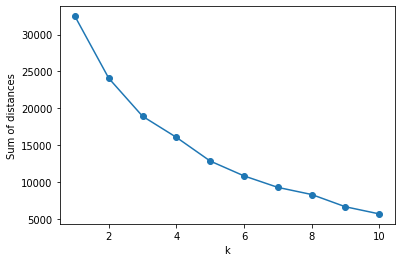

In [45]:
K = range(1, 11)
models = []
for k in K:
    models.append(KMeans(n_clusters=k, random_state=42).fit(new_data))
dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.show()

In [47]:
model = KMeans(n_clusters=2,random_state=42)
model.fit(new_data)
new_data['cluster'] = model.labels_
new_data.groupby('cluster').mean()

,class,cap-shape,cap-surface,cap-color
cluster,,,,
0,-0.964680,-0.051080,-0.172143,0.030276
1,1.036613,0.054889,0.184980,-0.032533


when performing clustering on scaled data - the dataset is easily separated into two clusters by the column 'class'

<AxesSubplot:>

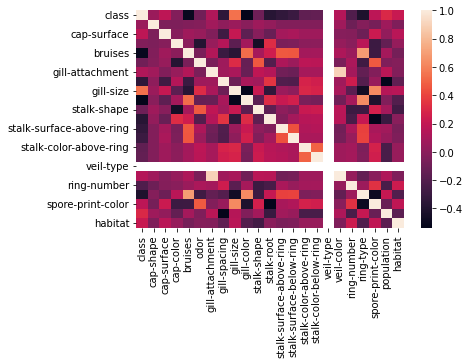

In [86]:
import seaborn as sns
corr = data.corr()

sns.heatmap(corr)